This notebook explores the NASA JPL Asteroid Dataset using machine learning techniques to create a model to predict whether asteoirds are potentially hazardous or not. The notebook covers the following aspects of machine learning:

1. Data Exploration
2. Data Wrangling
3. Data Preprocessing
4. ML Model Developing
5. Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [2]:
data = pd.read_csv('/Users/simarmalhan/Downloads/asteroid.csv')
data

/var/folders/05/073klxvx53gb5wt5h1z7h8ph0000gn/T/ipykernel_15578/2586511669.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/simarmalhan/Downloads/asteroid.csv')


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


### Basic Column Definition from the JPL Website

- **SPK-ID**: Object primary SPK-ID  
- **Object ID**: Object internal database ID  
- **Object fullname**: Object full name/designation  
- **pdes**: Object primary designation  
- **name**: Object IAU name  
- **NEO**: Near-Earth Object (NEO) flag  
- **PHA**: Potentially Hazardous Asteroid (PHA) flag  
- **H**: Absolute magnitude parameter  
- **Diameter**: Object diameter (from equivalent sphere) in km  
- **Albedo**: Geometric albedo  
- **Diameter_sigma**: 1-sigma uncertainty in object diameter in km  
- **Orbit_id**: Orbit solution ID  
- **Epoch**: Epoch of osculation in modified Julian day form  
- **Equinox**: Equinox of reference frame  
- **e**: Eccentricity  
- **a**: Semi-major axis in AU  
- **q**: Perihelion distance in AU  
- **i**: Inclination; angle with respect to x-y ecliptic plane  
- **tp**: Time of perihelion passage TDB in Units  
- **moid_ld**: Earth Minimum Orbit Intersection Distance in AU

## 1. Data Exploration

*We'll explore the columns of this dataframe and analyze them accordingly.*

In [3]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [4]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


*Many features have missing values. Before dealing with them, we need to know what kind of data each feature holds.*

In [5]:
data.shape

(958524, 45)

In [6]:
print(data['id'].nunique())
print(data['spkid'].nunique())
print(data['full_name'].nunique())
print(data['pdes'].nunique())

958524
958524
958524
958524


*No missing values exist in the asteroid identifying columns. So lets analyse the columns of 'object' dtype.*

In [7]:
# Potentially hazardous asteroids

data['pha'].value_counts(normalize = True) # to get the relative percentage of each hue

pha
N    0.997799
Y    0.002201
Name: proportion, dtype: float64

In [8]:
# Near Earth Object

data['neo'].value_counts(normalize = True)

neo
N    0.976114
Y    0.023886
Name: proportion, dtype: float64

In [9]:
# Asteroid orbit ID

print(data['orbit_id'].unique())
print(data['orbit_id'].nunique())

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [10]:
# Comet designation prefix

print(data['prefix'].unique())
print(data['prefix'].nunique())

[nan 'A']
1


In [11]:
data['equinox'].nunique()

1

In [12]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


*column full_name is split into pdes and name, so we can remove these columns as they wouldn't facilitate any analysis. Column id contains alphanumeric values and spkid has just numerical values so id can be removed as well.*

In [13]:
data1 = data.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis = 1, inplace = False)

## 2. Data Wrangling

In [14]:
data['name'].isnull().value_counts(normalize = True)

name
True     0.976981
False    0.023019
Name: proportion, dtype: float64

In [15]:
data['pha'].isnull().value_counts(normalize = True)

pha
False    0.979217
True     0.020783
Name: proportion, dtype: float64

In [16]:
print(data['sigma_a'].isnull().value_counts(normalize = True))
print(data['sigma_ad'].isnull().value_counts(normalize = True))
print(data['sigma_e'].isnull().value_counts(normalize = True))
print(data['sigma_i'].isnull().value_counts(normalize = True))
print(data['sigma_ma'].isnull().value_counts(normalize = True))
print(data['moid'].isnull().value_counts(normalize = True))

sigma_a
False    0.979216
True     0.020784
Name: proportion, dtype: float64
sigma_ad
False    0.979212
True     0.020788
Name: proportion, dtype: float64
sigma_e
False    0.979216
True     0.020784
Name: proportion, dtype: float64
sigma_i
False    0.979216
True     0.020784
Name: proportion, dtype: float64
sigma_ma
False    0.979216
True     0.020784
Name: proportion, dtype: float64
moid
False    0.979217
True     0.020783
Name: proportion, dtype: float64


*Sigma columns and moid seem to have the same rows of null values where the column pha is null*

In [17]:
asteroid_df = data1[data1['pha'].notna()]
asteroid_df = asteroid_df.drop(['diameter', 'albedo', 'diameter_sigma'], axis = 1)

*There are a few values missing in column 'H' - absolute magnitude. This can be determined using albedo and diameter but since those columns no longer exist, we can remove the rows with missing 'H' values.*

In [18]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]

In [19]:
asteroid_df = asteroid_df.dropna(subset=['sigma_ad', 'ma'])

In [20]:
asteroid_df

,spkid,full_name,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,e,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,1 Ceres,N,N,3.400,JPL 47,2458600.5,58600,20190427.0,0.076009,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2000002,2 Pallas,N,N,4.200,JPL 37,2459000.5,59000,20200531.0,0.229972,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2000003,3 Juno,N,N,5.330,JPL 112,2459000.5,59000,20200531.0,0.256936,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,2000004,4 Vesta,N,N,3.000,JPL 35,2458600.5,58600,20190427.0,0.088721,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,2000005,5 Astraea,N,N,6.900,JPL 114,2459000.5,59000,20200531.0,0.190913,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,3246801,(6013 P-L),N,N,17.135,JPL 5,2437203.5,37203,19600926.0,0.185919,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,3246834,(6331 P-L),N,N,18.500,8,2459000.5,59000,20200531.0,0.282920,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,3013075,(6344 P-L),Y,Y,20.400,17,2459000.5,59000,20200531.0,0.662446,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,3246457,(2060 T-2),N,N,18.071,JPL 3,2441956.5,41956,19731001.0,0.202053,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [21]:
asteroid_df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO'], dtype=object)

#### Column Data Types
*Certain Data Types will need to be changed for ML models to use. So, we convert columns 'neo', 'pha', and 'class' to categorical variables.*

In [22]:
columnstoconvert = ['neo', 'pha', 'class']

for column in columnstoconvert:
    asteroid_df[column] = asteroid_df[column].astype('category')

In [23]:
asteroid_df.head()

,spkid,full_name,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,e,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,1 Ceres,N,N,3.40,JPL 47,2458600.5,58600,20190427.0,0.076009,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2000002,2 Pallas,N,N,4.20,JPL 37,2459000.5,59000,20200531.0,0.229972,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2000003,3 Juno,N,N,5.33,JPL 112,2459000.5,59000,20200531.0,0.256936,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,2000004,4 Vesta,N,N,3.00,JPL 35,2458600.5,58600,20190427.0,0.088721,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,2000005,5 Astraea,N,N,6.90,JPL 114,2459000.5,59000,20200531.0,0.190913,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [24]:
asteroid_df['neo'].value_counts(normalize = True)

neo
N    0.975456
Y    0.024544
Name: proportion, dtype: float64

In [25]:
# How many of these near earth objects are potentially hazardous asteroids?

asteroid_df[asteroid_df['neo'] == 'Y']['pha'].value_counts(normalize = True)

pha
N    0.909715
Y    0.090285
Name: proportion, dtype: float64

*9% of the near earth objects are potentially hazardous asteroids.*

In [26]:
# How many asteroids of the dataset are potentially hazardous asteroids?

asteroid_df['pha'].value_counts(normalize = True)*100

pha
N    99.778406
Y     0.221594
Name: proportion, dtype: float64

*0.22% of the asteroids in the dataset are PHA.*

In [27]:
# Of the potentially hazardous asteroids, how many of them are near earth objects?

asteroid_df[asteroid_df['pha'] == 'Y']['neo'].value_counts(normalize = True)*100

neo
Y    100.0
N      0.0
Name: proportion, dtype: float64

/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


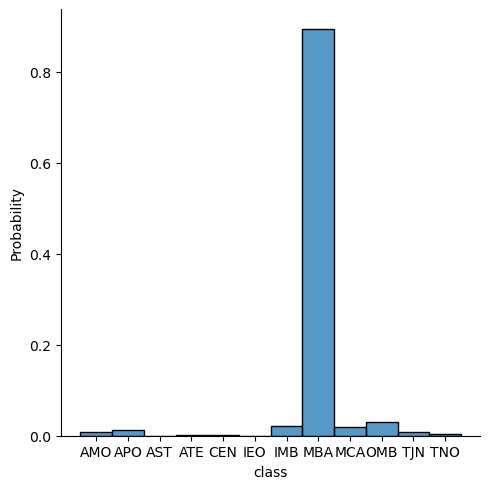

In [28]:
# What is the distribution of the orbit classification

sns.displot(asteroid_df, x = 'class', stat = 'probability')

*99.7% of the asteroids are non-hazardous. All the potentially hazardous asteroids (pha) are near earth objects (neo). On the other hand, only 9% of the neo are hazardous. Our focus is to predict if an asteroid is potentially hazardous.*

## 3. Data Preprocessing

Before creating machine learning models, it is imperative to make sure the data being provided isn't cumbersome. For example, the 'orbit_id' feature has 525 unique catergories to identify the asteroid's orbit. We can reduce this number by analysing the less occuring orbit IDs.

In [29]:
# Number of orbit_id values that have less than 10 occurances

orbits = asteroid_df['orbit_id'].value_counts().loc[lambda x: x < 10].index.to_list()
len(orbits)

331

There are 331 orbits that occur less than 10 times. We can replace these orbit ids by renaming them as 'others' so there is no loss of data.

In [30]:
asteroid_df.loc[asteroid_df['orbit_id'].isin(orbits), 'orbit_id'] = 'other'

We need to normalize the data before using it to train models, so all the numeric features need to be on the same scale. For this we will use the min-max scaler.

In [31]:
# Reset the index

asteroid_df = asteroid_df.reset_index(drop = True)

In [32]:
# Create the subset of only numerical columns to scale

subset_df = asteroid_df[asteroid_df.columns[~asteroid_df.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]

In [33]:
subset_df

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,3.400,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301
1,4.200,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,...,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936
2,5.330,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,...,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848
3,3.000,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,...,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980
4,6.900,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,...,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932330,17.135,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,...,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,0.23839
932331,18.500,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,...,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,0.53633
932332,20.400,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,...,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,0.51556
932333,18.071,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,...,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,0.25641


In [34]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns = subset_df.columns)
asteroid_df = pd.concat([asteroid_df[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']], scaled_df], axis = 1)
scaled_df.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,...,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,...,8.016988e-14,5.816901e-11,1.383063e-11,5.285854e-16,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,...,1.880819e-15,3.839709e-12,2.721975e-13,3.373713e-18,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,...,6.000437e-14,4.945222e-11,2.409083e-11,8.914896e-16,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194


In [35]:
asteroid_df

,spkid,full_name,neo,pha,orbit_id,class,H,epoch,epoch_mjd,epoch_cal,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,2000001,1 Ceres,N,N,JPL 47,MBA,0.131195,0.988218,0.988218,0.989134,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,2000002,2 Pallas,N,N,JPL 37,MBA,0.154519,1.000000,1.000000,1.000000,...,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134
2,2000003,3 Juno,N,N,other,MBA,0.187464,1.000000,1.000000,1.000000,...,8.016988e-14,5.816901e-11,1.383063e-11,5.285854e-16,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126
3,2000004,4 Vesta,N,N,JPL 35,MBA,0.119534,0.988218,0.988218,0.989134,...,1.880819e-15,3.839709e-12,2.721975e-13,3.373713e-18,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149
4,2000005,5 Astraea,N,N,other,MBA,0.233236,1.000000,1.000000,1.000000,...,6.000437e-14,4.945222e-11,2.409083e-11,8.914896e-16,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932330,3246801,(6013 P-L),N,N,JPL 5,MBA,0.531633,0.357949,0.357949,0.355202,...,7.191921e-07,1.259534e-04,6.198816e-06,1.386557e-09,8.200222e-10,1.889758e-07,2.145919e-05,1.257513e-11,3.802219e-08,0.000089
932331,3246834,(6331 P-L),N,N,8,MBA,0.571429,1.000000,1.000000,1.000000,...,6.163650e-13,2.824940e-10,4.663857e-11,7.124963e-15,3.887407e-15,4.388240e-15,4.344708e-13,4.502949e-17,8.256442e-16,0.000200
932332,3013075,(6344 P-L),Y,Y,17,APO,0.626822,1.000000,1.000000,1.000000,...,1.661975e-13,3.348706e-10,4.741499e-11,2.683406e-15,1.578719e-15,2.994698e-14,1.430717e-12,2.717448e-17,4.776552e-15,0.000192
932333,3246457,(2060 T-2),N,N,JPL 3,MBA,0.558921,0.497953,0.497953,0.495081,...,5.397438e-07,9.847822e-06,3.662413e-06,5.685030e-10,3.245590e-10,1.301632e-07,1.320595e-05,3.743063e-12,2.635422e-08,0.000095


Converting the categorical columns 'neo' and 'class', and object column 'orbit_id' into one-hot encoding variables.

In [36]:
# using get_dummies

asteroid_df1 = pd.get_dummies(asteroid_df, columns = ['neo', 'class', 'orbit_id'])
asteroid_df1.head()

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,...,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,...,False,False,False,False,False,False,False,False,False,False
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,...,False,False,False,False,False,False,False,False,False,False
2,2000003,3 Juno,N,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,...,False,False,False,False,False,False,False,False,False,True
3,2000004,4 Vesta,N,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,...,False,False,False,False,False,False,False,False,False,False
4,2000005,5 Astraea,N,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,...,False,False,False,False,False,False,False,False,False,True


## 4. ML Model Development

Now that the data is ready to be modeled, there are a wide range of algorithms that can be put to use. The goal is to predict if an asteroid is potentially hazardous or not. For this classification problem, we can use the following algorithms -

1. Logistic Regression
2. Random Forest
3. Light Gradient Boosting

The best performing model can be then selected to conduct reliable predictions.

In [37]:
from sklearn.model_selection import train_test_split

X = asteroid_df1.drop(['spkid', 'full_name', 'pha'], axis = 1)
#spkid and full_name aren't reqd for data modeling and pha would be output so we're dropping these columns.

y = asteroid_df1['pha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1501)

The data is highly imbalanced with over 99% of the data belonging to the negative class. This could sway away the models and predict only the negative class for any input. That's why, its best to oversample the positive class and create an equal sample numbers for both the classes. This is achieved by the library SMOTE.

In [38]:
print("Before OverSampling, counts of label 'N': {}".format(sum(y_train == 'N')))
print("Before OverSampling, counts of label 'Y': {} \n".format(sum(y_train == 'Y')))

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("Before OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))
print("Before OverSampling, counts of label 'Y': {} \n".format(sum(y_train_res == 'Y')))

Before OverSampling, counts of label 'N': 651221
Before OverSampling, counts of label 'Y': 1413 

Before OverSampling, counts of label 'N': 651221
Before OverSampling, counts of label 'Y': 651221 



#### Creating a function to calculate metrics of each model

In [43]:
def metriccalculation(y_test, pred):
    precision_metric = metrics.precision_score(y_test, pred, average = 'macro')
    recall_metric = metrics.recall_score(y_test, pred, average = 'macro')
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = 'macro')
    
    print('Precision: ', round(precision_metric, 2))
    print('Recall: ', round(recall_metric, 2))
    print('Accuracy: ', round(accuracy_metric, 4))
    print('F1 Score: ', round(f1_metric, 2))

#### 4.1 Logistic Regression

In [40]:
# import the model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logres = LogisticRegression(max_iter = 10000)

# fit the training model with features and labels
logres.fit(X_train_res, y_train_res)

# predict for test set
logres_pred = logres.predict(X_test)

In [44]:
# Calculate metrics

metriccalculation(y_test, logres_pred)

Precision:  0.61
Recall:  0.97
Accuracy:  0.9918
F1 Score:  0.67


In [45]:
# Confusion matrix

print(metrics.confusion_matrix(y_test, logres_pred))

[[276795   2253]
 [    29    624]]


Although the accuracy and recall of the model are high, the precision and F1 score paint a different picture. Low F1 score and precision prove that the model doesn't classify well and has a poor balance between the two classes. Based on the confusion matrix alone, we notice a high number of false positives. Logistic regression won't be strong enough to predict the nature of the asteroids.

#### 4.2 Random Forest

Random Forest is known to eliminate the chance of overfitting and with the help of its ensemble method, it could be a better classifier than logistic regression.

In [46]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model with 150 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 1551)

# Train the model on training data
rf.fit(X_train_res, y_train_res)

# Predict for test set
rf_pred = rf.predict(X_test)

In [47]:
# Calculate metrics
metriccalculation(y_test, rf_pred)

Precision:  0.97
Recall:  1.0
Accuracy:  0.9999
F1 Score:  0.99


The random forest classifier has a higher F1-score and precision than the logistic regression model, proving that its a better model for identifying the nature of an asteroid. Using this model, we can identify the important features that help in determining the type of asteroid.

In [48]:
feature_imp = pd.DataFrame(rf.feature_importances_, index = X_train_res.columns, columns = ['Importance']) \
.sort_values(by = 'Importance', ascending = False)

In [49]:
feature_imp.head(10)

,Importance
moid_ld,0.167182
neo_Y,0.135231
neo_N,0.128321
q,0.108030
moid,0.106346
class_MBA,0.078021
e,0.073294
H,0.072132
class_APO,0.049076
n,0.044234


So, Random Forest model says the most earth minimum orbit intersection distance (moid), followed by identifying if the object in question is a near earth object (neo) or not.

In [51]:
# 10 least important features
feature_imp.tail(10)

,Importance
orbit_id_JPL 73,3.532255e-08
orbit_id_65,2.048438e-08
orbit_id_JPL 86,1.548753e-08
orbit_id_JPL 106,6.023227e-09
orbit_id_JPL 65,3.912076e-09
orbit_id_JPL 87,2.888306e-09
orbit_id_JPL 82,1.271871e-12
class_AST,0.000000e+00
orbit_id_JPL 110,0.000000e+00
sigma_tp,0.000000e+00


Orbit IDs do not contribute much to the model. The dataset can be modified by eliminating the orbit_id feature completely. Similarly, we can also eliminate the features sigma_ma and sigma_tp that have zero importance.

To do this, we'll create a new dataset with one-hot encoding and dropping the orbit_id column.

In [52]:
asteroid_df2 = pd.get_dummies(asteroid_df, columns = ['neo', 'class'])
asteroid_df2.drop(['orbit_id', 'sigma_ma', 'sigma_tp'], axis = 'columns', inplace = True)

In [54]:
# Create new train test splits

X1 = asteroid_df2.drop(['spkid', 'full_name', 'pha'], axis = 1)
y1 = asteroid_df2['pha']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 1501)

In [55]:
# Create equal balance of classes using SMOTE

sm = SMOTE(random_state = 12)
X_train_res1, y_train_res1 = sm.fit_resample(X_train1, y_train1.ravel())

print('After oversampling, counts of label "N": {}'.format(sum(y_train_res1 == "N")))
print('After oversampling, counts of label "Y": {}'.format(sum(y_train_res1 == "Y")))

After oversampling, counts of label "N": 651221
After oversampling, counts of label "Y": 651221


In [56]:
# Instantiate model with 150 decision trees

rf = RandomForestClassifier(n_estimators = 150, random_state = 1551)

# Train the model on training data
rf.fit(X_train_res1, y_train_res1)

# Predict the test set
rf_pred1 = rf.predict(X_test1)

In [57]:
# Calculate metrics

metriccalculation(y_test, rf_pred1)

Precision:  0.98
Recall:  1.0
Accuracy:  0.9999
F1 Score:  0.99


In [58]:
print(metrics.confusion_matrix(y_test, rf_pred1))

[[279024     24]
 [     4    649]]


As can be seen, the model performance has improved with fewer false positives and false negatives. Thus, Random Forest can be used to predict the nature of an asteroid.